# Ice Cream Trend of Below Zero - Ice Cream Store.

Importing libraries make the program more sophisticated. 

In [1]:
#import required libraries 
import pandas as pd
import numpy as np
import csv
%matplotlib inline
import matplotlib.pyplot as plt
import datetime

Read the csv files to get the data files contain.

In [2]:
#read the csv files
Store_region = pd.read_csv("Region.csv") 
Store_detail = pd.read_csv("StoreDetails.csv")
Weekly_sales = pd.read_csv("Weekly_Sales.csv")

The Store_region file contains data about the Below-Zero icecream store's different branches in different regions.
It is clear that ice cream store has 45 branches in 5 different regions.

In [3]:
Store_region.head()

,Store,Region
0,1,A
1,2,A
2,3,A
3,4,A
4,5,A


Store_detail file shows the all 45 stores and gives information about temperature and unemployment on particular date.

In [4]:
Store_detail.head()

,Store,Date,Temperature,Unemployment
0,1,5/02/2010,42.31,8.106
1,1,12/02/2010,38.51,8.106
2,1,19/02/2010,39.93,8.106
3,1,26/02/2010,46.63,8.106
4,1,5/03/2010,46.50,8.106


The Weekly_Sales file contains the information about weekly sale in stores on particular date.

In [5]:
Weekly_sales.head()

,Store,Date,Weekly_Sales
0,1,5/02/2010,24924.50
1,1,12/02/2010,46039.49
2,1,19/02/2010,41595.55
3,1,26/02/2010,19403.54
4,1,5/03/2010,21827.90


Two data files called Store_detail and Store_region are combined together and store the information in dataframe known as data.
After merging the data it shows the data joined from both the files.

In [6]:
##merge the dataframes(Store_detail and Store_region) together
data = Store_detail.merge(Store_region, on="Store",suffixes=("", "_2"))
data.head()

,Store,Date,Temperature,Unemployment,Region
0,1,5/02/2010,42.31,8.106,A
1,1,12/02/2010,38.51,8.106,A
2,1,19/02/2010,39.93,8.106,A
3,1,26/02/2010,46.63,8.106,A
4,1,5/03/2010,46.50,8.106,A


Merge the Weekly_sales file with other two ice cream data files i.e. Store_region and Store_detail in new dataframe called data1.

In [7]:
#merge the three dataframes together i.e. Store_region,Store_detail and Weekly_sales
data1 = data.merge(Weekly_sales, on = ("Store","Date"),suffixes = ("", "_2"))
data1.head()

,Store,Date,Temperature,Unemployment,Region,Weekly_Sales
0,1,5/02/2010,42.31,8.106,A,24924.50
1,1,12/02/2010,38.51,8.106,A,46039.49
2,1,19/02/2010,39.93,8.106,A,41595.55
3,1,26/02/2010,46.63,8.106,A,19403.54
4,1,5/03/2010,46.50,8.106,A,21827.90


Set the index by 'Store'.

In [8]:
##set an index by "store"
data2 = data1.set_index("Store")
data2.head()

,Date,Temperature,Unemployment,Region,Weekly_Sales
Store,,,,,
1,5/02/2010,42.31,8.106,A,24924.50
1,12/02/2010,38.51,8.106,A,46039.49
1,19/02/2010,39.93,8.106,A,41595.55
1,26/02/2010,46.63,8.106,A,19403.54
1,5/03/2010,46.50,8.106,A,21827.90


The given code shows the all ice cream stores in different regions.

In [9]:
data2["Region"]

Store
1     A
1     A
1     A
1     A
1     A
1     A
1     A
1     A
1     A
1     A
1     A
1     A
1     A
1     A
1     A
1     A
1     A
1     A
1     A
1     A
1     A
1     A
1     A
1     A
1     A
1     A
1     A
1     A
1     A
1     A
     ..
45    E
45    E
45    E
45    E
45    E
45    E
45    E
45    E
45    E
45    E
45    E
45    E
45    E
45    E
45    E
45    E
45    E
45    E
45    E
45    E
45    E
45    E
45    E
45    E
45    E
45    E
45    E
45    E
45    E
45    E
Name: Region, Length: 6435, dtype: object

# Comparing sales in the five different regions.

Text(0,0.5,'Sales')

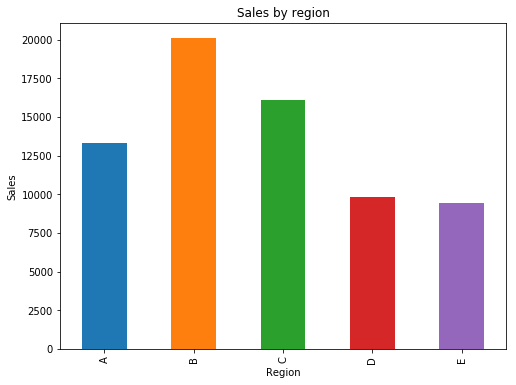

In [10]:
data2.groupby("Region")["Weekly_Sales"].std().plot(kind="bar", figsize = (8,6))
plt.title("Sales by region")
plt.ylabel("Sales")

Creating a new column 'year' by extracting it from date column to analyse the sales trend in three years. 

In [11]:
#create year column
data2['Year'] = pd.DatetimeIndex(data2['Date']).year
data2.head()

,Date,Temperature,Unemployment,Region,Weekly_Sales,Year
Store,,,,,,
1,5/02/2010,42.31,8.106,A,24924.50,2010
1,12/02/2010,38.51,8.106,A,46039.49,2010
1,19/02/2010,39.93,8.106,A,41595.55,2010
1,26/02/2010,46.63,8.106,A,19403.54,2010
1,5/03/2010,46.50,8.106,A,21827.90,2010


In [12]:
data2.Date.str[-4:] ##different method to extract the years from date.

Store
1     2010
1     2010
1     2010
1     2010
1     2010
1     2010
1     2010
1     2010
1     2010
1     2010
1     2010
1     2010
1     2010
1     2010
1     2010
1     2010
1     2010
1     2010
1     2010
1     2010
1     2010
1     2010
1     2010
1     2010
1     2010
1     2010
1     2010
1     2010
1     2010
1     2010
      ... 
45    2012
45    2012
45    2012
45    2012
45    2012
45    2012
45    2012
45    2012
45    2012
45    2012
45    2012
45    2012
45    2012
45    2012
45    2012
45    2012
45    2012
45    2012
45    2012
45    2012
45    2012
45    2012
45    2012
45    2012
45    2012
45    2012
45    2012
45    2012
45    2012
45    2012
Name: Date, Length: 6435, dtype: object

# The change in ice cream sales over the period 2010 to 2012.

sales 2010: 42843534.379999995
sales 2011: 45349314.39999997
sales 2012: 35445927.76000003


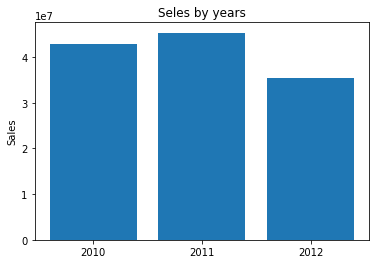

In [13]:
#initialising variables
a=0
sum2010=0
sum2011=0
sum2012=0
year=[]
#open and read csv into readCSV variable
with open('Weekly_Sales.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    #calculate year wise sales 
    for row in readCSV:
        if a is 0:
            a=1
        else:
            #print(row)
            a=row[1].split("/")
            #print(a[2])
            if int(a[2]) == int(2010):
                sum2010+=float(row[2])
            if int(a[2]) == int(2011):
                sum2011+=float(row[2])
            if int(a[2]) == int(2012):
                sum2012+=float(row[2])
            #print(row[0],row[1],row[2])
print("sales 2010: "+str(sum2010)+"\nsales 2011: "+str(sum2011)+"\nsales 2012: "+str(sum2012))
#formation of graph

#data = [go.Bar( x=['2010','2011','2012'], y=[sum2010,sum2011,sum2012] )]
#py.iplot(data, filename='pandas-time-series')
objectsABC = ('2010','2011','2012')
pos = np.arange(len(objectsABC))
performance = [sum2010,sum2011,sum2012]
plt.bar(pos, performance, align='center', alpha=1)
plt.xticks(pos, objectsABC)
plt.ylabel('Sales')
plt.title('Seles by years')
plt.show()

# Showing the weekly sales trend per store

Text(0,0.5,'Weekly sales')

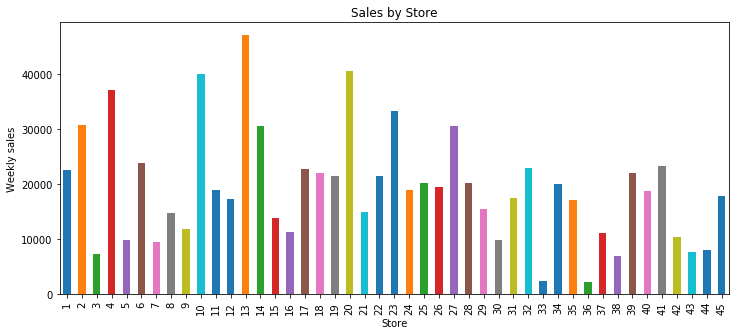

In [14]:
##total weekly sales per store
data2.groupby("Store")["Weekly_Sales"].mean().plot(kind ="bar",figsize = (12,5))
plt.title("Sales by Store")
plt.ylabel("Weekly sales")

# compare sales against the different store details (i.e. temperature and unemployment) to see what the relationship between them is

In [15]:
data2["AvgSales"] =data2 ["Weekly_Sales"]/1000
data2.head()

,Date,Temperature,Unemployment,Region,Weekly_Sales,Year,AvgSales
Store,,,,,,,
1,5/02/2010,42.31,8.106,A,24924.50,2010,24.92450
1,12/02/2010,38.51,8.106,A,46039.49,2010,46.03949
1,19/02/2010,39.93,8.106,A,41595.55,2010,41.59555
1,26/02/2010,46.63,8.106,A,19403.54,2010,19.40354
1,5/03/2010,46.50,8.106,A,21827.90,2010,21.82790


Text(0,0.5,'Avg sale and Temperature')

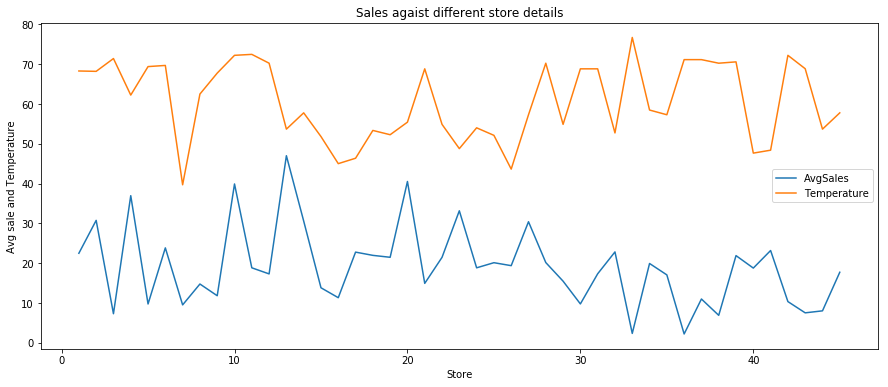

In [16]:
data2.groupby("Store")["AvgSales","Temperature"].mean().plot(kind="line", figsize = (15,6))
plt.title("Sales agaist different store details")
plt.ylabel("Avg sale and Temperature" )